<a href="https://colab.research.google.com/github/glauciodrumond/Data_Science_Projects/blob/master/AAC_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animal Protection

A lot of species of animals, over the years, have been used by humans for many things and in many ways, such as: for entertainment, protection, transportation, company, and others.

Most of the time this relationship works as an exchange, such as using the horsepower to farm or put an animal in the zoo to entertain people.

But there is a problem when these animals don't achieve what the humans propose them to do or when people just got tired of them or yet people think that they are spending too much money with them, these animals become homeless.

According to the [**American Society for the Prevention of Cruelty to Animals (ASPCA)**](https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics):

*   Approximately 6.5 million companion animals enter U.S. animal shelters nationwide every year.

*   Of those, approximately 3.3 million are dogs and 3.2 million are cats. 

*  Each year, approximately 1.5 million shelter animals are euthanized (670,000 dogs and 860,000 cats)
<figure>
<center><img src="https://image.freepik.com/free-vector/animal-shelter-horizontal-illustration-with-pets-sitting-cages-volunteers-feeding-animals-flat_1284-32955.jpg" /></center></figure>

# Austin Animal Center

[Austin Animal Center](http://www.austintexas.gov/department/about-austin-animal-center) provides shelter to more than 16,000 animals annually plus animal protection and pet resource services to Austin and unincorporated parts of Travis County. They accept stray and owned animals regardless of *age, health, species, or breed.*

Austin Animal Center's goal is to place all adoptable animals in forever homes through adoption, foster care, or rescue partner groups.

One of the AAC Mission Statement is to provide placement services that will assist lost, homeless or sheltered animals to their homes or find new homes when necessary, to provide live outcomes for at least **90% of sheltered animals.**
<figure>
<center><img src='https://austintexas.gov/sites/default/files/aac_logo.jpg' /></center></figure>





# Business Problem 

With the data provided by Austin Animal Center, in the [City of Austin Open Data Portal](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) that can be download in this link [here](https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD) we are going to forecast the percentage of animals adopted, transferred to rescue, or returned to their owners. Afterward, we can check if Austin Animal Center, will accomplish the mission statement for the next 365 days.

## Data

Animal Center Outcomes from Oct, 1st 2013 to present. The Outcomes data set reflects that Austin, TX. is the largest "**No-Kill**" city in the **USA.**

### Variables

* `Outcome Type`: represent the status of animals as they leave the Animal Center.

* `Animal ID`: every animal receives a unique id during the intake.



    




In [0]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [0]:
# loading data
url = 'https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD'
#df = pd.read_csv(r'Austin_Animal_Center_Outcomes.csv')
df = pd.read_csv(url)

# Analysis exploratory

## Info

We load the data into a data frame, that we called df, as our first step. Afterward, we used a method `.info` to check our data frame basic information and to see how our data present. 
Check below the results.


In [3]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118099 entries, 0 to 118098
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         118099 non-null  object
 1   Name              81098 non-null   object
 2   DateTime          118099 non-null  object
 3   MonthYear         118099 non-null  object
 4   Date of Birth     118099 non-null  object
 5   Outcome Type      118092 non-null  object
 6   Outcome Subtype   53702 non-null   object
 7   Animal Type       118099 non-null  object
 8   Sex upon Outcome  118096 non-null  object
 9   Age upon Outcome  118048 non-null  object
 10  Breed             118099 non-null  object
 11  Color             118099 non-null  object
dtypes: object(12)
memory usage: 10.8+ MB


This is the information we got:

* Total entries(rows) is 118087,
* We have 12 columns,
* All columns type is an `object`.
* Columns: `Name`, `Outcome Type`, `Outcome Subtype`, `Sex upon Outcome`, and `Age upon Outcome` has missing values. 

Columns with mixed types are stored with the `object` dtype by the `Pandas` library. 

For example, the column `DateTime`, `MonthYear`, and `Date of Birth` can be changed to datatime dtypes. Also, we can check the column `Age` if we change to `int` or `float` dtype. 

We are going to rename some columns by changing spacing from columns name to underscore(_). 

In [4]:
# new names for this columns
mapper = {'Animal ID': 'Animal_ID',
          'DateTime': 'Date_Time',
          'MonthYear': 'Month_Year',
          'Date of Birth':'Date_Birth',
          'Outcome Type': 'Outcome_Type',
          'Outcome Subtype': 'Outcome_Subtype',
          'Animal Type': 'Animal_Type', 
          'Sex upon Outcome': 'Sex_Outcome',
          'Age upon Outcome': 'Age_Outcome'}

# renaming columns
df=df.rename(columns=mapper)
print('This is our new columns names:')
print('------------------------------\n',df.columns)

This is our new columns names:
------------------------------
 Index(['Animal_ID', 'Name', 'Date_Time', 'Month_Year', 'Date_Birth',
       'Outcome_Type', 'Outcome_Subtype', 'Animal_Type', 'Sex_Outcome',
       'Age_Outcome', 'Breed', 'Color'],
      dtype='object')


In [5]:
# change type from object to datetime
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Month_Year'] = pd.to_datetime(df['Month_Year'])
df['Date_Birth'] = pd.to_datetime(df['Date_Birth'])
print('Date_Time type:',df.Date_Time.dtype)
print('Month_Year type:',df.Month_Year.dtype)
print('Date_Birth type:',df.Date_Birth.dtype)

Date_Time type: datetime64[ns]
Month_Year type: datetime64[ns]
Date_Birth type: datetime64[ns]


## Head

We've done our first modifications in our data frame. We can now use our method `head()`, to see the first entries from our data frame and inspect it.

In [6]:
# data frame first entries
df.head(5)

Animal_ID        Name  ...                               Breed              Color
0   A794011       Chunk  ...              Domestic Shorthair Mix  Brown Tabby/White
1   A776359       Gizmo  ...             Chihuahua Shorthair Mix        White/Brown
2   A720371       Moose  ...  Anatol Shepherd/Labrador Retriever               Buff
3   A674754         NaN  ...              Domestic Shorthair Mix       Orange Tabby
4   A689724  *Donatello  ...              Domestic Shorthair Mix              Black

[5 rows x 12 columns]

* `Animal_ID` has a letter followed by numbers. That's why our Pandas library classified it as an object type.

* `Date_Time`, `Month_Year`, and `Date_Birth` columns have the correct type.

* `Month_Year` column has also hour info in it.

* `Age` column as we suspected has mixed types(`int` and `string`). The animal's age is divided into days, weeks, months, and years.

# Columns
 
We don't have a lot of columns, so let's explore some of them. We will see if we can get any insights from it and learn more about our data.

## Animal_Type
The first column we are going to check is the animal type. From this column, we can see which animal has appeared more in our data, the percentage, types of animals, and others. So below is the results of our analysis.

* Dog has most entries representing more than 50% of the data.

* Dog and cat represent almost 95% of `Animal_Type`.

* Livestock has only 18 entries.

In [7]:
# plot animals by type
#x= df.Animal_Type.value_counts()
fig = px.histogram(df, x='Animal_Type',width=600, height=300)
fig.update_layout(margin = dict(l=10, r=20, t=20,b=20))
fig.show()

# check animal type
print('Percentage animals by type\n--------------------')
print((df.Animal_Type.value_counts()/df.shape[0])*100)

Percentage animals by type
--------------------
Dog          56.889559
Cat          37.407599
Other         5.223584
Bird          0.464017
Livestock     0.015241
Name: Animal_Type, dtype: float64


## Name

From the column name, we will not get usable information that can help solve problems. However,  I was curious to learn a couple of thing like:

1.   How people name animals?
2.   What is the most chosen name?

In [8]:
# animals names
df.Name.value_counts().head(20)

Max         531
Bella       500
Luna        462
Rocky       358
Daisy       346
Princess    328
Charlie     316
Coco        310
Lucy        304
Buddy       297
Blue        297
Lola        264
Zeus        219
Jack        200
Bear        197
Cookie      196
Oreo        195
Shadow      195
Lucky       194
Sadie       193
Name: Name, dtype: int64

And our most chosen name is `Max` followed by `Bella` and `Luna` and at least to me, there are some funny names such as `Oreo` and `Cookie`. 

There is no pattern in naming animals. They are named after objects, people even named after other animals like `Bear`.

Ok, let's get back from our distraction and see what the `Date_Time` column can tell us.

## Date_Time

This column refers to when an animal left the Austin Animal Center for some reason. This reason is showed in the column `Outcome_Type`. 
This is the actions that we going to perform here:

* Let's check our data range and
* Plot histogram to check frequency.

In [9]:
# timeline range
print('Data Frame timeline range:')
print('--------------------------')
print('From:', df.Date_Time.min())
print('To:', df.Date_Time.max())

Data Frame timeline range:
--------------------------
From: 2013-10-01 09:31:00
To: 2020-06-11 11:30:00


In [10]:
# plot histogram
fig=px.histogram(df, x='Date_Time',width=600, height=300,
                 range_x=('2014-01-01','2019-12-31'))
fig.update_layout(margin = dict(l=10, r=20, t=20,b=20))
fig.show()

October first, 2013, is the oldest entry in our data. So, we have at least 6 years of full data collected. The histogram plotted ranges from January first, 2014 to December thirty-first, 2019.

Having a look at the chart, we can see a pattern in the distribution. Usually, at the beginning of the year, the distribution is decreasing. After the first two months, the numbers start to increase until getting to the top, which usually is between June and July.

One of the main reasons for the increase, of the count of the outcomes, is probably because this time of the year is when kids are in school break and probably their parents give pets to them to be their companion.

## Date_Birth

Having a look at our date birth chart below we can notice some behavior.

Most of our animals date of birth in our data set ranges from 2015 to 2020 and also we can notice an increase in the birth rate in April. 

The top 2 animal types that represent almost 95% of our data dogs and cats. They have an average life span of 20 years and 30 years respectively. 

That may explain why we don't see many animals with data birth before 2005.  

Also, people tend to like younger animals. In our most common case, when they are puppies and kittens, to give them to their children. So the kids can stay with the pets for a long period, considering the animals as part of the family.

In [11]:
# plot histogram
fig=px.histogram(df, x='Date_Birth',width=600, height=300)
fig.update_layout(margin = dict(l=10, r=20, t=20,b=20))
fig.show()

## Age_Outcome

This column refers, as the name says, the age of the animal when the Austing Animal Center has an outcome for him. From the chart we can observe that:

* The animals, 33% of the time have an outcome when they are 1 or 2 years old.
* 25 years old, is the oldest animal that had an outcome.
* Negative age: -1 year and -3 years, were registered for some animals. An input error can be the cause of this. Or we can assume that the animal was in a period of development of the embryo. 

In [12]:
# calculates the percentage
top_age = round((df.Age_Outcome.value_counts(ascending=False).head(2)/df.shape[0]).sum()*100)
print('Top 2 ages outcomes represents:',top_age,'% of the data.\n')

# plot histogram
fig=px.histogram(df, y='Age_Outcome',width=600, height=800,
                 orientation='h').update_yaxes(categoryorder='total ascending')
fig.update_layout(margin = dict(l=10, r=20, t=20,b=20))
fig.show()

Top 2 ages outcomes represents: 33.0 % of the data.



## Outcome_Type

An animal can have 9 different types of outcomes. From the list below,  we can see that adoption is the most outcome registered.

About 7% of the outcome, represents euthanasia. Also, about 1% are animals that died in the facility.

Remember that Austin Animal Center has a goal to provide live outcomes for at least 90% of sheltered animals.


In [13]:
# count values and percentage
table = pd.concat([df.Outcome_Type.value_counts(),
                  df.Outcome_Type.value_counts(normalize=True).mul(100)],axis=1, 
                  keys=('Counts', 'Percentage'))
print(table)

                 Counts  Percentage
Adoption          52024   44.053789
Transfer          35071   29.698032
Return to Owner   20750   17.571046
Euthanasia         7950    6.732039
Died               1084    0.917928
Rto-Adopt           619    0.524168
Disposal            507    0.429326
Missing              67    0.056735
Relocate             20    0.016936


# Forecast Time Series

To forecast the outcomes, I am going to do a step by step process here. Also, I am going to be using Facebook Prophet as a tool. So, what is Facebook Prophet?

"Prophet is a forecasting procedure implemented in R and Python. 

It is fast and provides completely automated forecasts that can be tuned by hand by data scientists and analysts.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well." 

[Source](https://facebook.github.io/prophet/)



# Select columns

Prophet takes as an input a data frame with two columns: one with the date and one numeric column. The numeric column represents the measure that we wish to forecast.

In [14]:
# pass to a new data frame values selected
outcome = df[(df.Outcome_Type == 'Adoption') | (df.Outcome_Type =='Return to Owner')]

# create new column with value = 1
outcome['Outcome_Count'] = 1

# create new data frame
outcome = outcome[['Date_Time', 'Outcome_Count']]
outcome = outcome.set_index('Date_Time').sort_index()
outcome.head()

Outcome_Count
Date_Time                         
2013-10-01 09:31:00              1
2013-10-01 11:03:00              1
2013-10-01 11:42:00              1
2013-10-01 11:50:00              1
2013-10-01 11:53:00              1

Now that we have our two columns we must rename it to ds and y. In this format, the prophet knows how to work with the data. It will first fit and later on forecast outcomes.

We will work with daily data. So, we must resample it and sum the values. Also, we could work with data in week mode.

In [15]:
# resample the data to daily and sum values, also change column names
prophet = outcome.resample('D').sum().reset_index().rename(columns={'Date_Time':'ds', 'Outcome_Count':'y'})
prophet.head()

ds   y
0 2013-10-01  24
1 2013-10-02  27
2 2013-10-03  17
3 2013-10-04  20
4 2013-10-05  43

Finally, we are all set to create our forecasting model. We must import our libraries to do this next step.

# Checks for Stationarity

I used the [machine learning mastery](https://machinelearningmastery.com/time-series-data-stationary-python/#:~:text=Time%20series%20are%20stationary%20if,can%20be%20easier%20to%20model.) article as a resource for this part of the project.

There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary. We are going to be using the [Augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test).

We interpret the result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise, a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

Summing up:

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [19]:
# import library
from statsmodels.tsa.stattools import adfuller
# extracting values
X = prophet.y

# apply ADF and print results
result = adfuller(X)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.3f}'.format(result[0]))
print('P Value: {:.10f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t{}: {:.3f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -3.815
P Value: 0.0027553073
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Running the code above prints the statistic value of -3. The more negative this statistic, the more likely we are to reject the null hypothesis.

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -3.815 is less than the value of -3.433 at 1%.

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is **stationary** or does not have a time-dependent structure.

## Day model

In [20]:
# import libraries
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

# instantiating a new Prophet object.
day_model = Prophet(daily_seasonality=True)

# also, we can add holidays in the model
day_model.add_country_holidays(country_name='US')

# Different from other machine learning models, 
#  that take inputs and targets separately, 
#  prophet takes the historical data frame.
day_model.fit(prophet)

The model is trained by now and it can forecast the outcomes for the next 365 days.  After this step, the results will be plotted in a chart.

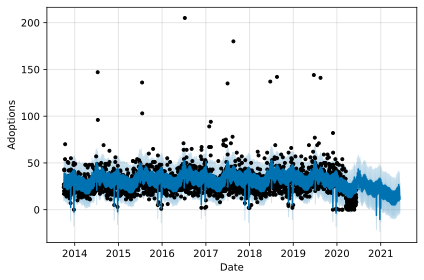

In [21]:
# determine days for forecasting
future = day_model.make_future_dataframe(periods=365)

# forecast
forecast = day_model.predict(future)

# visualize chart with forecast
day_model.plot(forecast, xlabel='Date', ylabel='Adoptions', figsize=(6,4));

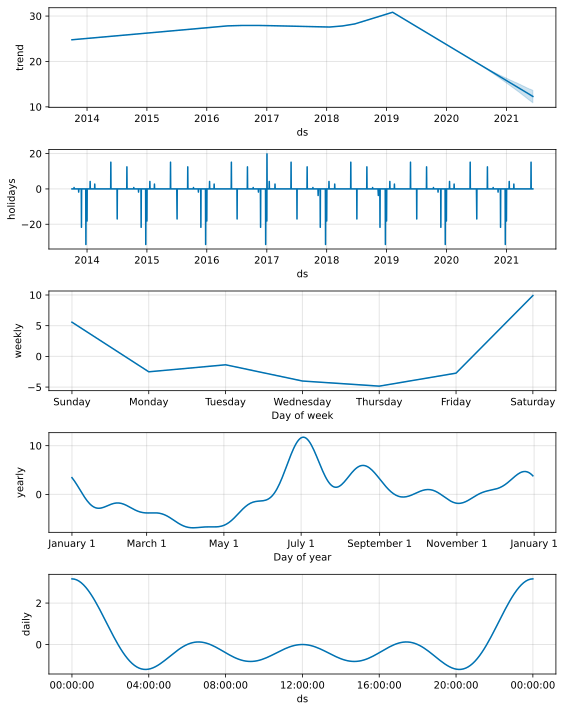

In [22]:
# separate model components
day_model.plot_components(forecast,figsize=(8,10));

## Accuracy


In [23]:
# cross-validation the model
day_cv = cross_validation(day_model, horizon='365 days')
day_cv.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2016-12-11 12:00:00 and 2019-06-12 00:00:00


ds       yhat  yhat_lower  yhat_upper   y              cutoff
0 2016-12-12  31.048364   18.457435   43.641647  24 2016-12-11 12:00:00
1 2016-12-13  31.290906   19.459300   43.537571  40 2016-12-11 12:00:00
2 2016-12-14  29.160403   16.897843   41.659057  26 2016-12-11 12:00:00
3 2016-12-15  28.903216   17.145720   42.025194  25 2016-12-11 12:00:00
4 2016-12-16  30.447817   18.586145   42.925161  22 2016-12-11 12:00:00

In [24]:
# metrics perfomance
day_perf = performance_metrics(day_cv)
day_perf.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon         mse       rmse        mae     mdape  coverage
0 36 days 12:00:00  235.414863  15.343235  10.043286  0.237795  0.767123
1 37 days 00:00:00  236.856375  15.390139  10.104316  0.237269  0.757991
2 37 days 12:00:00  236.938725  15.392814  10.089968  0.237269  0.757991
3 38 days 00:00:00  240.961206  15.522925  10.256696  0.245386  0.744292
4 38 days 12:00:00  242.786111  15.581595  10.299648  0.245386  0.739726

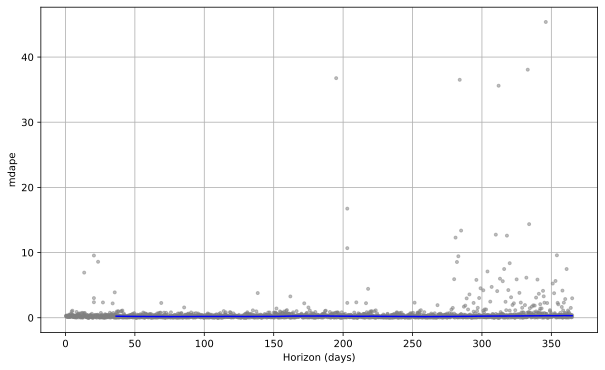

In [25]:
# plot mdap metric
fig = plot_cross_validation_metric(day_cv, metric='mdape')